In [110]:
#/Pandas function for reading data from a CSV file, and df is a Pandas DataFrame,
import pandas as pd  
#/provides support for large,arrays and matrices, along with mathematical functions to operate on these arrays
import numpy as np   
#/It is a versatile tool for visualizing data in various ways. 
import matplotlib.pyplot as plt 
#/It is particularly useful for creating informative statistical visualizations with minimal code
import seaborn as sns 
#/This function is commonly used for splitting a dataset into train & test sets
from sklearn.model_selection import train_test_split 
#/Linear regression assumes a linear relation between the features & the target Value and to find the coefficients
#that minimize the difference between the predicted and actual values.
from sklearn.linear_model import LinearRegression 
#/The R-squared (R2) score is a metric used to evaluate the performance of a regression model.It provides an indication of how well
#the predicted values match the actual values.
from sklearn.metrics import r2_score 
#It is used for converting categorical variables into a binary matrix representation, commonly known as one-hot encoding.
from sklearn.preprocessing import OneHotEncoder
#This function is used to create a composite transformer that applies different transformers to different subsets of the columns.
from sklearn.compose import make_column_transformer
#This function is used to create a machine learning pipeline, which is a sequence of data processing steps followed by 
#the application of a machine learning model. 
from sklearn.pipeline import make_pipeline

#### Data Collection and Processing

In [111]:
df=pd.read_csv( r'C:\Users\LENOVO\Downloads\quikr_car.csv',encoding = 'Unicode_escape')

In [112]:
df.head()

name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

   kms_driven fuel_type  
0  45,000 kms    Petrol  
1      40 kms    Diesel  
2  22,000 kms    Petrol  
3  28,000 kms    Petrol  
4  36,000 kms    Diesel

In [113]:
df.shape

(892, 6)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [115]:
#checking specific column deeply
df['year'].unique

<bound method Series.unique of 0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object>

#### Quality issues

1) year has many non-year values
2) year object to int
3) price has Ask for Price
4) Price object to int
5) kms_driven has kms with integers
6) kms_driven object to int
7) kms _driven has nan values
8) fuel_type has nan values
9) keep first 3 words of name

#### Data Cleansing

In [116]:
#Taking backup of dataset
backup=df.copy()

In [117]:
#checking all data is numeric o/p:- True, False
df=df[df['year'].str.isnumeric()]

In [118]:
#Eleminating 'Ask for Price' cells
df=df[df['Price']!="Ask For Price"]

In [119]:
#Removing Commas from column
df['Price']=df['Price'].str.replace(',','').astype(int)

In [120]:
#Removing commas from kms_driven column like 45,000 -> 45000
df['kms_driven']= df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [121]:
#Removing non numeric values
df = df[df['kms_driven'].str.isnumeric()]

In [122]:
#removing Null values
df = df[~df['fuel_type'].isna()]

In [123]:
#changing car names picking only last three words from name
df['name']= df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [124]:
#resetting index values
df= df.reset_index(drop=True)

In [125]:
df

name   company  year   Price kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000      45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000         40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000      28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000      36000    Diesel
4                 Ford Figo      Ford  2012  175000      41000    Diesel
..                      ...       ...   ...     ...        ...       ...
811      Maruti Suzuki Ritz    Maruti  2011  270000      50000    Petrol
812          Tata Indica V2      Tata  2009  110000      30000    Diesel
813    Toyota Corolla Altis    Toyota  2009  300000     132000    Petrol
814            Tata Zest XM      Tata  2018  260000      27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013  390000      40000    Diesel

[816 rows x 6 columns]

In [126]:
#changing dtype obj to int
df['year']= df['year'].astype(int)

In [127]:
#changing dtype obj to int
df['kms_driven']= df['kms_driven'].astype(int)

In [128]:
df.describe()

year         Price     kms_driven
count   816.000000  8.160000e+02     816.000000
mean   2012.444853  4.117176e+05   46275.531863
std       4.002992  4.751844e+05   34297.428044
min    1995.000000  3.000000e+04       0.000000
25%    2010.000000  1.750000e+05   27000.000000
50%    2013.000000  2.999990e+05   41000.000000
75%    2015.000000  4.912500e+05   56818.500000
max    2019.000000  8.500003e+06  400000.000000

In [129]:
df=df[df['Price']<6e6].reset_index(drop=True)

In [130]:
df.describe()

year         Price     kms_driven
count   815.000000  8.150000e+02     815.000000
mean   2012.442945  4.017933e+05   46277.096933
std       4.005079  3.815888e+05   34318.459638
min    1995.000000  3.000000e+04       0.000000
25%    2010.000000  1.750000e+05   27000.000000
50%    2013.000000  2.999990e+05   41000.000000
75%    2015.000000  4.900000e+05   56879.000000
max    2019.000000  3.100000e+06  400000.000000

In [131]:
#savinng to new csv file
df.to_csv('Cleaned car.csv')

#### Model Training

In [132]:
x= df.drop(columns='Price')
y=df['Price']

#### Splitting training data and testing data

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [134]:
x_train.shape

(652, 5)

#### Encoding data using OneHotencoder

In [135]:
ohe= OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [136]:
#applying Onehotencoder to specific columns excepting other columns
column_trans = make_column_transformer((OneHotEncoder(categories= ohe.categories_),['name','company','fuel_type']),
    remainder='passthrough')

In [137]:
lr= LinearRegression()

#### Creating pipeline following steps like -> Transfomation ->LinearRegresion for training and prediction

In [138]:
pipe= make_pipeline(column_trans,lr)

In [139]:
#The pipeline is now trained and ready to make predictions on new data, 
#  with both the column transformer and linear regression model fitted to the training data.

pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [140]:
#Using trained pipeline to make prediction on test data x_test
y_pred= pipe.predict(x_test)

#### Visualization of Actual vs Predicted Price

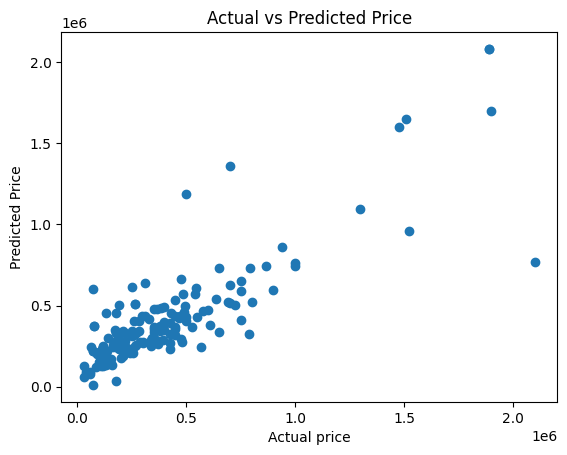

In [141]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')  
plt.show()

In [142]:
r2_score(y_test,y_pred)

0.7141612743526211

In [151]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [152]:
np.argmax(scores)

433

In [153]:
scores[np.argmax(scores)]

0.8457059012561223

In [161]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size =0.2,random_state=np.argmax(scores))
lr= LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8457059012561223

In [162]:
import pickle

In [163]:
pickle.dump(pipe,open('LinearRegression.pkl','wb'))

In [157]:
import pandas as pd
test_data = pd.DataFrame([['Maruti Suzuki Ritz','Maruti',2011,50000,'Petrol']],
                         columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'])

try:
    # Ensure the column names and types match what the model expects
    result = pipe.predict(test_data)
    
    # If successful, 'result' contains the predictions
    print(result)
    
except ValueError as ve:
    # If there is a ValueError, print the error message for further investigation
    print(f"ValueError: {ve}")


[234832.83917963]
